In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()
#age, cabin, embarked contain null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#CLEAN AND SIMPLIFY
#define methods to easily apply to multiple dataframes

#six age groups, one unknown
def clean_age(df):
    df['Age'] = df['Age'].fillna(-1)
    bins = (-5,0,3,12,18,30,60,100)
    bin_names = ['Unknown','Baby','Child','Teen','Young_Adult','Mid_Adult','Senior']
    df['Age'] = pd.cut(df['Age'], bins, labels=bin_names)
    return df

#four fare groups, one unknown, find distribution with df_train['Fare'].describe()
def clean_fare(df):
    df['Fare'] = df['Fare'].fillna(-1)
    bins = (-5,0,8,15,31,513)
    bin_names = ['Unknown','Low','Mid_Low','Mid_High','High']
    df['Fare'] = pd.cut(df['Fare'], bins, labels=bin_names)
    return df
    
#parse first letter of cabin
def clean_cabin(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    return df

#fillna for Embarked
def clean_embark(df):
    df['Embarked'] = df['Embarked'].fillna('N')
    return df
    
#drop useless features: Name, Ticket
def drop_features(df):
    return df.drop(['Name','Ticket'], axis=1)

#combine methods 
def transform(df):
    df = clean_age(df)
    df = clean_fare(df)
    df = clean_cabin(df)
    df = clean_embark(df)
    df = drop_features(df)
    return df

#clean BOTH train and test
df_train = transform(df_train)
df_test = transform(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,Young_Adult,1,0,Low,N,S
1,2,1,1,female,Mid_Adult,1,0,High,C,C
2,3,1,3,female,Young_Adult,0,0,Low,N,S
3,4,1,1,female,Mid_Adult,1,0,High,C,S
4,5,0,3,male,Mid_Adult,0,0,Mid_Low,N,S


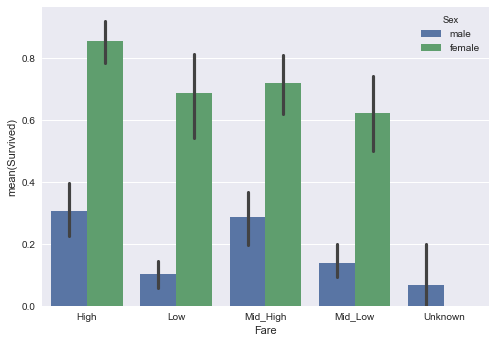

In [4]:
#VISUALIZATION
sns.barplot(x="Fare", y="Survived", hue="Sex", data=df_train);
sns.plt.show()

In [5]:
#convert unique strings to numbers 
def encode(df_train, df_test):
    features = ['Sex','Age','Fare','Cabin','Embarked']
    df_combined = pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

df_train, df_test = encode(df_train, df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,6,1,0,1,7,3
1,2,1,1,0,2,1,0,0,2,0
2,3,1,3,0,6,0,0,1,7,3
3,4,1,1,0,2,1,0,0,2,3
4,5,0,3,1,2,0,0,3,7,3


In [6]:
#TRAIN TEST SPLIT
y = df_train['Survived'].values
X = df_train.drop(['PassengerId','Survived'], axis=1).values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

#KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.815642458101


In [7]:
#PREDICT TEST FILE
ID = df_test['PassengerId']
predictions = knn.predict(df_test.drop('PassengerId', axis=1))

result = pd.DataFrame({'PassengerId':ID, 'Survived':predictions})
result.head()
#result.to_csv('KNeighbor_model.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
